In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [3]:
import ar2gas as gas
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
import helpers

In [4]:
data = gs.DataFile(flname='dataset.csv', x='x', y='y')

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

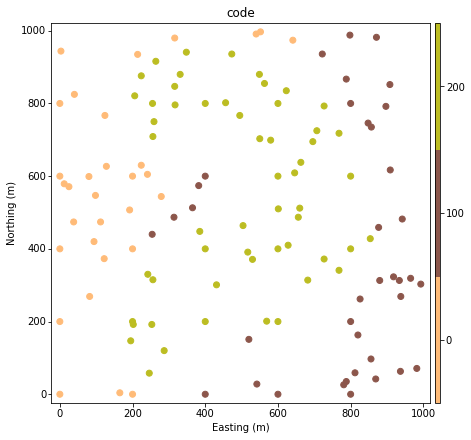

In [5]:
gs.locmap(data, x='x', y='y', figsize=(7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

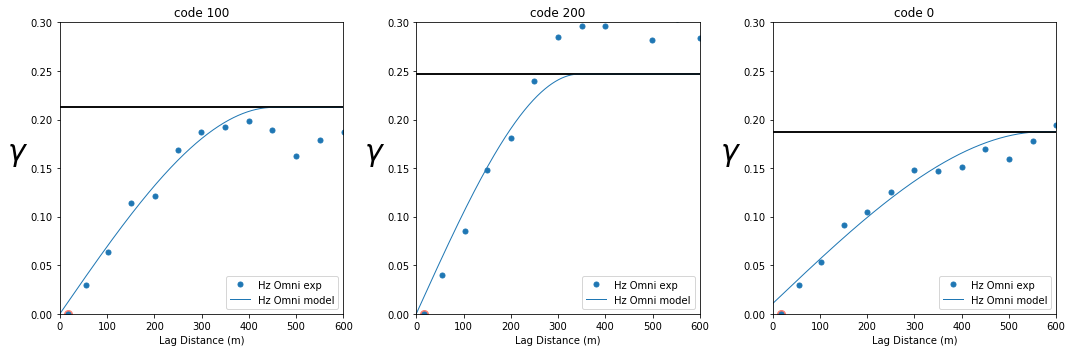

In [6]:
codes = data.data.code.unique()
fig, axes = plt.subplots(1, 3, figsize=(15,5))
variograms = {}
for idx, c in enumerate(codes):
    data['ind_{}'.format(c)] = np.where((data['code'] == c) == True, 1, 0)
    vario = gs.Variogram(data, 'ind_{}'.format(c), ndim=2, ndir=1, omnihz=True, mute=True, warn=False)
    vario.settols(nlags=12, lagdist=50, lagtol=25)
    vario.varcalc()
    vario.fitmodel(sill=np.var(data['ind_{}'.format(c)]))
    ax = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], axes=axes[idx], ms=5)
    variograms['code {}'.format(int(c))] = helpers.gslibvar_to_ar2gasvar(vario.model)
    plt.tight_layout()

In [7]:
a2ggrid, gsgrid = helpers.autogrid(data.data.x, data.data.y, None, 1, 1, 1)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

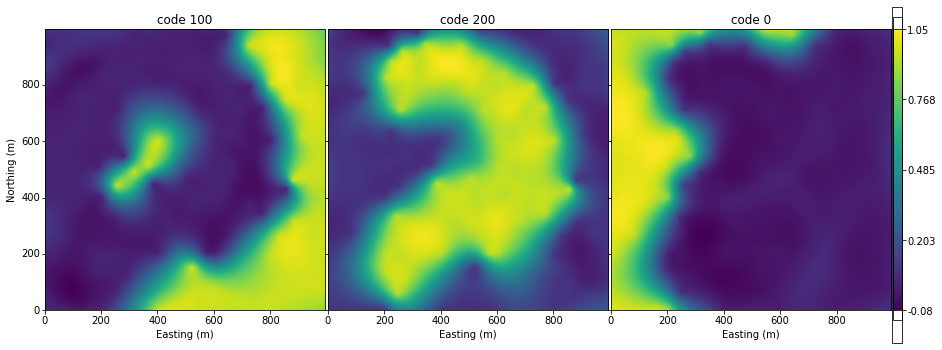

In [26]:
ind_krig = {}
fig, axes = gs.subplots(1, 3, figsize=(20,5), cbar_mode='single')
ps = gas.data.PointSet(data.data.x.values, data.data.y.values, np.zeros(len(data.data.y.values)))
for idx, c in enumerate(codes):
    krig_cov = gas.compute.KrigingCovariance(1.,variograms['code {}'.format(int(c))])
    kriger = gas.compute.DualKriging.OK(krig_cov, ps, data.data['ind_{}'.format(c)], 0)
    results = np.ones(a2ggrid.size())*float('nan')
    kriger.compute(a2ggrid, results, 0)
    ind_krig['code {}'.format(int(c))] = results
    gs.pixelplt(results, gsgrid, ax = axes[idx], title='code {}'.format(int(c)))
    
    plt.tight_layout()